# DEBARSHI CHAKRABORTY
# DATA SCIENCE AND BUSINESS ANALYTICS INTERN @THE SPARKS FOUNDATION
# GRIP MAY 2021 - TASK 2: PREDICTION USING UNSUPERVISED ML

# Importing Libraries

In [1]:
#We first import the libraries we may need in performing our task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check out the Data

In [20]:
#Time to get the data
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data.shape

(150, 6)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Method Used : K Means Clustering

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

# The Clustering

In [27]:
#remove the column that is not required
df = data.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
from sklearn.cluster import KMeans

We generally choose the number of cluster keeping in mind that the **Sum of Squares Within the Cluster** , generrally
abbreviated  as **SSW** is minimised. So , we go on computing the values of SSW for fifferent values of K = number of clusters.


In [32]:
SSW = []

for x in range (1,10):
    kmeans=KMeans(x)
    kmeans.fit(df)
    SSW_i=kmeans.inertia_
    SSW.append(SSW_i)
    
print(SSW)    

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.95701115711987, 34.19846461871464, 30.077530998389694, 28.0448609782031]


Now , we can see that SSW decreases as K increases - but we cannot actually go on increasing K as large as possible, that doesn't serve our purpose . Therefore , we try to look for that value of K for which SSW decreases significantly  and consider that as optimum . One way to execute this is **The Elbow Method**.

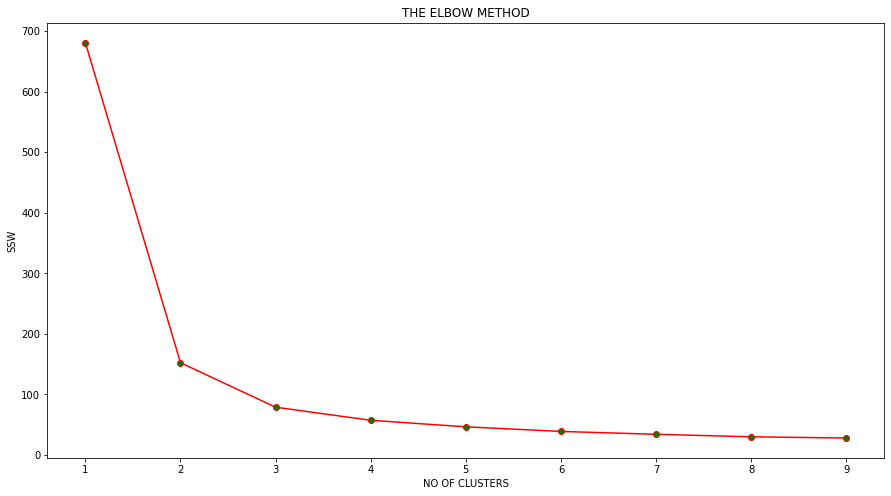

In [66]:
plt.figure(figsize=(15,8))
plt.plot(range(1,10),SSW,color='red',marker='o',markerfacecolor='green')
plt.title("THE ELBOW METHOD")
plt.xlabel("NO OF CLUSTERS")
plt.ylabel("SSW")
plt.show()

From the diagram above , it seems that the elbow occurs at K = 3 , therefore we choose K ( no of clusters ) = 3 for our work.

In [55]:
kmeans = KMeans(n_clusters=3,random_state=101)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=101)

In [56]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [57]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [58]:
ctable = data.iloc[:,1:6]
ctable['Cluster'] = kmeans.fit_predict(df)
ctable

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


# Visual Representation

Visualizing sepal length vs sepal width

[Text(0.5, 0, 'SEPAL LENGTH')]

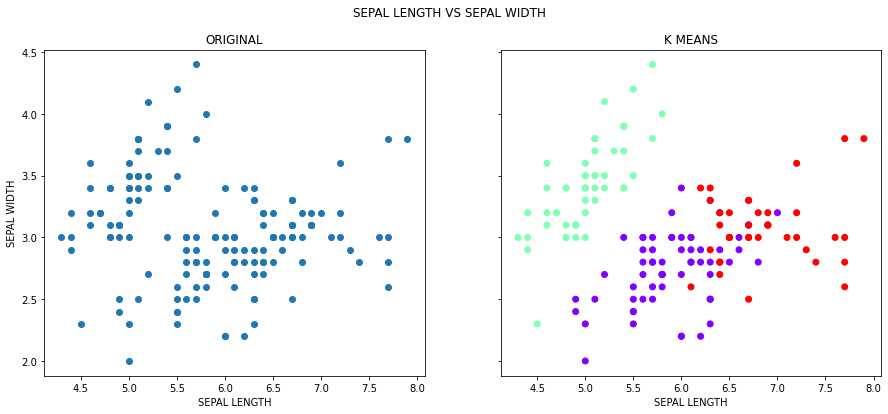

In [60]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,6))
f.suptitle("SEPAL LENGTH VS SEPAL WIDTH")

ax1.set_title('ORIGINAL')
ax1.scatter(data['SepalLengthCm'],data['SepalWidthCm'])
ax1.set(xlabel='SEPAL LENGTH',ylabel='SEPAL WIDTH')
ax2.set_title("K MEANS")
ax2.scatter(data["SepalLengthCm"],data['SepalWidthCm'],c=ctable['Cluster'],cmap='rainbow')
ax2.set(xlabel='SEPAL LENGTH')

Visualizing petal length vs petal width

[Text(0.5, 0, 'PETAL LENGTH')]

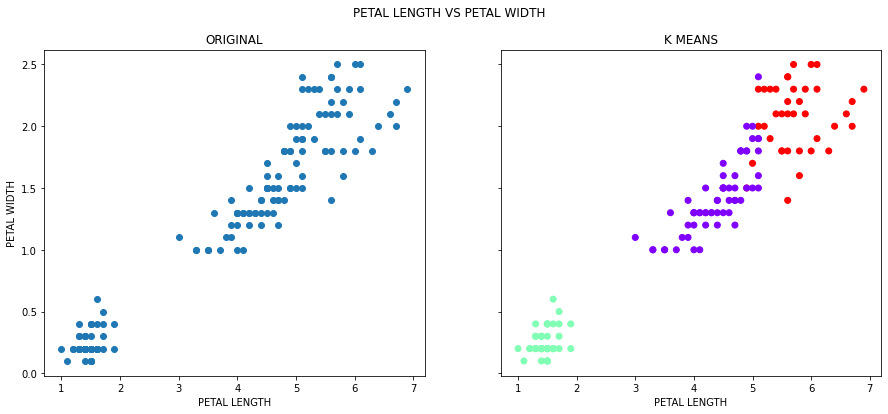

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,6))
f.suptitle("PETAL LENGTH VS PETAL WIDTH")

ax1.set_title('ORIGINAL')
ax1.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
ax1.set(xlabel='PETAL LENGTH',ylabel='PETAL WIDTH')
ax2.set_title("K MEANS")
ax2.scatter(data["PetalLengthCm"],data['PetalWidthCm'],c=ctable['Cluster'],cmap='rainbow')
ax2.set(xlabel='PETAL LENGTH')

*Hence,we are done.looks like we did a good job! but unfortunately,we cannot evaluate this using confusion matrix or other classification metrics unless we have real labels - which we rarely get in real life data. Therefore, we satisfy ourselves at this point only.*